# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [155]:
#%pip install tensorflow --upgrade
#%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.utils import np_utils
from keras.utils import to_categorical
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [156]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [157]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

c:\Users\remia\anaconda3\envs\Labo1\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [158]:
batch_size = 128
n_epoch = 50

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.5777 - loss: 1.7924 - val_accuracy: 0.8548 - val_loss: 1.0128
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8328 - loss: 0.9427 - val_accuracy: 0.8978 - val_loss: 0.6175
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8721 - loss: 0.6222 - val_accuracy: 0.9082 - val_loss: 0.4468
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8872 - loss: 0.4810 - val_accuracy: 0.9147 - val_loss: 0.3667
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8968 - loss: 0.4075 - val_accuracy: 0.9198 - val_loss: 0.3240
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.9023 - loss: 0.3709 - val_accuracy: 0.9213 - val_loss: 0.3002
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9068 - loss: 0.3463 - val_accuracy: 0.9237 - val_loss: 0.2823
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9120 - loss: 0.3216 - 

Show the performance of the model

Test score: 0.22754907608032227
Test accuracy: 0.9352999925613403


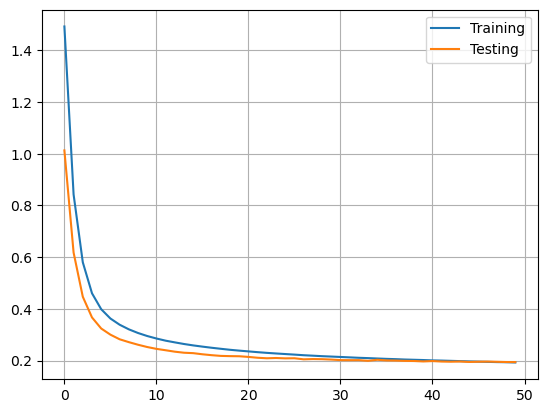

In [159]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [160]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step


array([[ 946,    1,    1,    0,    3,   13,    9,    5,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    1,   12,    0],
       [  10,    4,  963,    8,    8,    1,   11,    8,   18,    1],
       [   8,    3,   16,  924,    2,   18,    1,   14,   21,    3],
       [   0,    1,    6,    0,  926,    2,   12,    3,    3,   29],
       [  14,    2,    4,   21,    5,  806,    8,    6,   21,    5],
       [  13,    2,    8,    0,    4,   15,  912,    0,    4,    0],
       [   2,    7,   23,    8,    6,    0,    1,  961,    2,   18],
       [   6,    7,   11,   12,    7,   25,    8,    9,  885,    4],
       [   9,    8,    1,   12,   31,   12,    0,   16,    2,  918]],
      dtype=int64)

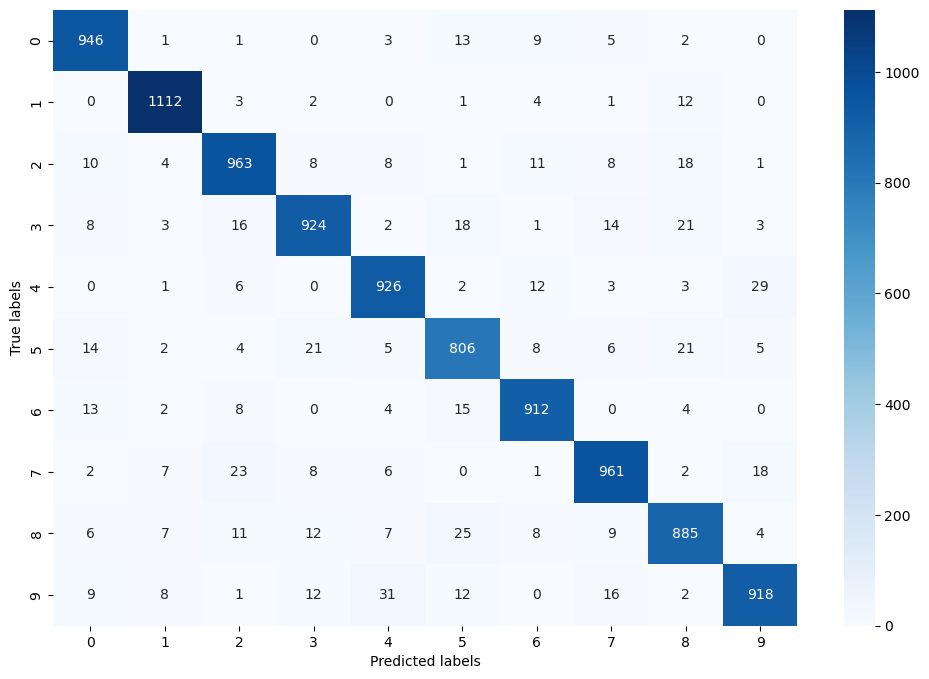

In [161]:
#plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
